In [59]:
!pip install CoolProp

In [60]:
from CoolProp.CoolProp import PropsSI

In [61]:
Q1 = 1 # quality
P1 = 140000 # Pa
h1 = PropsSI('H','P',P1,'Q',Q1,'R134a')
s1 = PropsSI('S','P',P1,'Q',Q1,'R134a')
T1 = PropsSI('T','P',P1,'Q',Q1,'R134a')

In [62]:
P2 = 800000 # Pa
h2 = PropsSI('H','P',P2,'S',s1,'R134a')
s2 = PropsSI('S','P',P2,'S',s1,'R134a')
T2 = PropsSI('T','P',P2,'S',s1,'R134a')

In [63]:
P3 = P2
h3 = PropsSI('H','P',P3,'Q',0,'R134a')
s3 = PropsSI('S','P',P3,'Q',0,'R134a')
T3 = PropsSI('T','P',P3,'Q',0,'R134a')

In [64]:
P4 = 140000
# h4 = h3
# s4 = PropsSI('S','P',P4,'H',h4,'R134a')
s4 = s3
h4 = PropsSI('H','P',P4,'S',s4,'R134a')
T4 = PropsSI('T','P',P4,'H',h4,'R134a')
Q4 = PropsSI('Q','P',P4,'H',h4,'R134a')

In [65]:
mdot_kgPerS = 0.05

In [66]:
QL_W = mdot_kgPerS*(h1 - h4)
print('The rate of heat removal from the refrigerated space is {0:1.2f} W.'.format(QL_W))

The rate of heat removal from the refrigerated space is 7510.60 W.


In [67]:
Win_W = mdot_kgPerS*(h2 - h1)
print('The power input to the compressor is {0:1.2f} W.'.format(Win_W))

The power input to the compressor is 1810.60 W.


In [68]:
QH_W = mdot_kgPerS*(h2 - h3)
print('The heat rejected from the refrigerant environment is {0:1.2f} W.'.format(QH_W))

The heat rejected from the refrigerant environment is 8994.33 W.


In [69]:
COP = QL_W/Win_W
print('The coefficient of performance is {0:1.2f}.'.format(COP))

The coefficient of performance is 4.15.


In [70]:
import CoolProp
from CoolProp.Plots import PropertyPlot

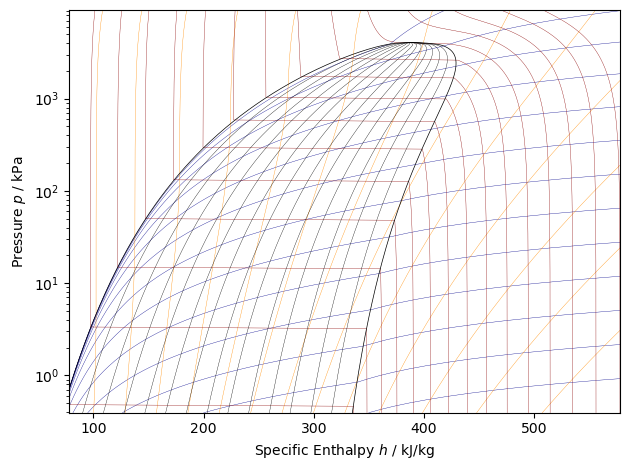

In [71]:
plot = PropertyPlot('R134a', 'ph')
plot.calc_isolines()
plot.show()

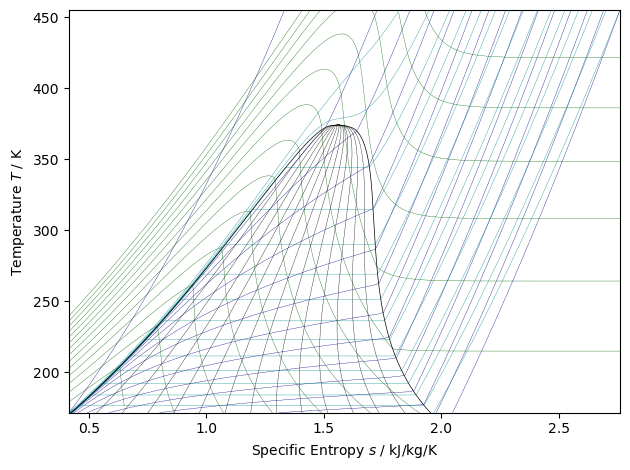

In [72]:
plot = PropertyPlot('R134a', 'Ts')
plot.calc_isolines()
plot.show()

In [73]:
import numpy as np
import matplotlib.pyplot as plt

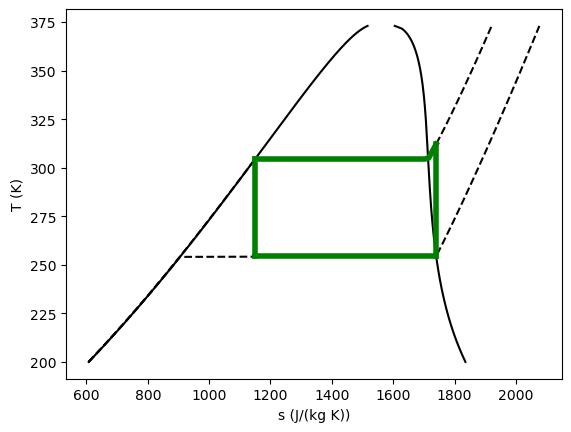

In [74]:
plt.figure()
plt.clf()
T = np.linspace(200, 373, 500) # range of temperatures
for P in [140000,800000]: #MPa
    S = [PropsSI('S','P',P,'T',t,'R134a') for t in T]
    plt.plot(S, T, 'k--')

# saturated vapor and liquid entropy lines
svap = [PropsSI('S','T',t,'Q',1,'R134a') for t in T]
sliq = [PropsSI('S','T',t,'Q',0,'R134a') for t in T]

#sliq = [s.s for s in [IAPWS97(T=t, x=0) for t in T]]

plt.plot(svap, T, 'k-')
plt.plot(sliq, T, 'k-')

plt.xlabel('s (J/(kg K))')
plt.ylabel('T (K)')
plt.savefig('vaporCompression.png')

plt.plot([s1, s2], [T1, T2], 'g-', lw=4) # Path 1 to 2

S23 = np.linspace(s2, s3)
T23 = [PropsSI('T','P',P2,'S',s,'R134a') for s in S23]
plt.plot(S23,T23, 'g-', lw=4)

plt.plot([s3, s4], [T3, T4], 'g-', lw=4) # path from 3 to 4 

T41 = np.linspace(T4, T1) 
Q41 = np.linspace(Q4, Q1)
S41 = [PropsSI('S','P',P4,'Q',q,'R134a') for q in Q41]
plt.plot(S41, T41, 'g-', lw=4) # and from 4 to 1 is isobaric

In [75]:
print(T1)

254.39042962421675


In [76]:
print(T2)

312.1269857977964


In [77]:
print(T3)

304.47746316327664


In [78]:
print(T4)

254.39042962421678
